# Q1 Data Icebreaker: Let’s break the ice with some data! (3 Marks)

In [153]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
# Load the dataset
df = pd.read_csv('TaxiData.csv')

```
Analysis on overall Dataset.
Provide info about columns and its Datatypes.
State missing values and other organic analysis.
```

### Q1.a
Categorize columns: classify columns as categorical, numerical, or mixed data types.

In [14]:
# Check data shape, summary, ...
print(f"Shape of the data is{df.shape}")


categorical_columns = ["pickup_community_area" ,"trip_start_month"  ,"trip_start_hour","trip_start_day" ,"payment_type" ,"company", "dropoff_community_area" ]
numerical_columns = ["fare" ,"trip_start_timestamp","pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude","trip_miles","pickup_census_tract","dropoff_census_tract" ,"trip_seconds" , "tips" ]

df.head()


Shape of the data is(15002, 18)


,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
13853,3.0,12.45,1,0,3,1970-01-01 00:00:01.357000200,41.972929,-87.650290,41.899786,-87.648077,4.4,1.703108e+10,1.703135e+10,Credit Card,Taxi Affiliation Services,960.0,8.0,3.0
3051,32.0,5.65,1,2,3,1970-01-01 00:00:01.357006500,41.880994,-87.632746,41.880994,-87.632746,0.9,1.703108e+10,1.703184e+10,Cash,Taxi Affiliation Services,360.0,32.0,0.0
3704,8.0,8.25,1,2,3,1970-01-01 00:00:01.357007400,41.900221,-87.629105,41.879255,-87.642649,0.0,1.703108e+10,1.703128e+10,Cash,Taxi Affiliation Services,600.0,28.0,0.0
7914,6.0,8.25,1,2,3,1970-01-01 00:00:01.357007400,41.938391,-87.638575,41.914616,-87.631717,2.3,1.703108e+10,1.703107e+10,Cash,Taxi Affiliation Services,480.0,7.0,0.0
14530,22.0,5.85,1,2,3,1970-01-01 00:00:01.357007400,41.915910,-87.683826,41.906026,-87.675312,0.0,1.703108e+10,1.703124e+10,Cash,Taxi Affiliation Services,300.0,24.0,0.0


### Q1.b
Type Conversion: Convert data types where necessary to facilitate analysis, noting why certain columns are converted.

In [10]:
#changing the data type as required
for cols in categorical_columns:
    df[cols] = df[cols].astype('category')

for col in numerical_columns:
    if col == "trip_start_timestamp":
        df[col] = pd.to_datetime(df[col])  # Convert to datetime
    else:
        df[col] = pd.to_numeric(df[col], errors='raise')  # Convert to numeric


### Q1.c
Identify Missing Values: Check for missing values in each column and visualize them using a heatmap or bar chart. Discuss which columns have significant missing values.

No of rows with any missing value: 15002

No of null values for each column :
pickup_community_area         2
fare                          0
trip_start_month              0
trip_start_hour               0
trip_start_day                0
trip_start_timestamp          0
pickup_latitude               2
pickup_longitude              2
dropoff_latitude            482
dropoff_longitude           482
trip_miles                    0
pickup_census_tract       15001
dropoff_census_tract       4241
payment_type                  0
company                    5140
trip_seconds                  6
dropoff_community_area      506
tips                          0
dtype: int64


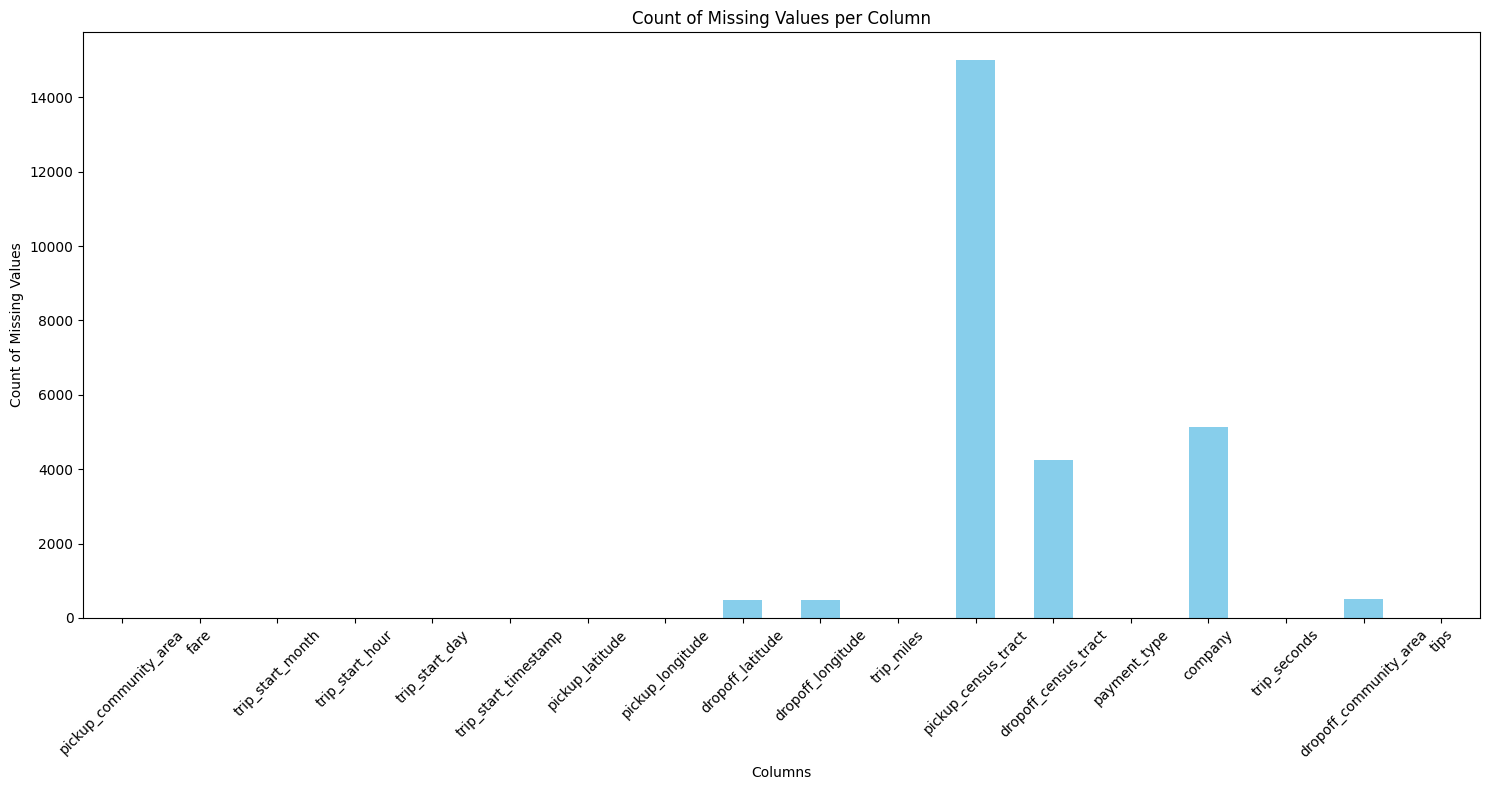

In [11]:
# Identify missing values
# Plot missing values (customize as needed)

missing_values = df[df.isnull().any(axis=1)]
print(f"No of rows with any missing value: {missing_values.shape[0]}\n")


na_counts_per_column = df.isnull().sum()



print(f"No of null values for each column :\n{na_counts_per_column}")


plt.figure(figsize=(15, 8))
na_counts_per_column.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# # Any change of data type conversion required?
# print(df[df["pickup_census_tract"].notnull()]["pickup_census_tract"])


Clearly the **Pickup Census Tract**, **dropoff census tract**, **company** have a lot of missing values in the data, also the **drop off community area**, **dropoff longitude**, **droppoff latitude** have significnt null values too, the rest of the columns either have no or either very few missing values.


### Q1.d
Handling Missing Values: Propose methods to handle missing data based on the column’s type (e.g., mean imputation for numerical,) and apply them where ever appropriate. Mention the method used and the column name on which it is applied.

In [12]:
#sorting the value by timestamps for further imputation help
df = df.sort_values(by="trip_start_timestamp")




#imputing the pickup census tract with a constant value since only one non-null value is present
non_null_values = df[df["pickup_census_tract"].notnull()]["pickup_census_tract"]
print(non_null_values.shape)
val = non_null_values.iloc[0]
print(f"The only non-null value in the column is {val}")
df["pickup_census_tract"] = df["pickup_census_tract"].fillna(val)





#for the categorical columns fill data according to the probabilities of them occuring in the non null data set to ensure the distribution remains the same
for cols in categorical_columns:
    # Get non-null values and their frequencies
    non_null_values = df[cols].dropna()
    value_counts = non_null_values.value_counts()
    values = value_counts.index
    weights = value_counts.values

    # Sample based on frequencies and fill NaN values
    df[cols] = df[cols].fillna(np.random.choice(values, p=weights / weights.sum()))



#for the columns with the numerical values the mean of the whole data is placed in place of the null values
for cols in numerical_columns:
    mean_value = df[cols].mean()
    # Fill missing values with the mean
    df[cols] = df[cols].fillna(mean_value)
    




na_counts_per_column = df.isnull().sum()
print(f"No of null values for each column :\n{na_counts_per_column}")
df.to_csv('TaxiData_fixed.csv', index=False)



(1,)
The only non-null value in the column is 17031081401.0
No of null values for each column :
pickup_community_area     0
fare                      0
trip_start_month          0
trip_start_hour           0
trip_start_day            0
trip_start_timestamp      0
pickup_latitude           0
pickup_longitude          0
dropoff_latitude          0
dropoff_longitude         0
trip_miles                0
pickup_census_tract       0
dropoff_census_tract      0
payment_type              0
company                   0
trip_seconds              0
dropoff_community_area    0
tips                      0
dtype: int64


***Imputation Techniques***

**COLUMNS**- pickup_census_tract

`Constant Value Imputation` - The pickup_census_tract column had only one non-null value in the data set hence it made sense to full the data with the given data set, further analysing the dropoff_census_tract it showed that the values were not so different cloes values and since these two columns are bound to have some relation in their values we chose to impute it by the given single value.

**COLUMNS**- pickup_community_area, company, dropoff_community_area

`Filling Categorical Values randomly according to their frequencies in the non-null data`

For the categorical columns we filled the non null values with random samples taken on basis of the frequency distribution in the non null part of the data, thus the value are filled according to the probabilities of them occuring in the non null data set to ensure the distribution remains the same.

**COLUMNS**- pickup_latitude,pickup_longitude, dropoff_latitude, dropoff_longitude, dropoff_census_tract, trip_seconds

`Mean Value Imputation`
For the numerical columns the null data are replaced by the mean of the data values ensuring the overall mean property of the data remains the same.

